https://plot.ly/python/reference/#layout-updatemenus

In [1]:
import ANEMO.ANEMO as A
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

init_notebook_mode(connected=True)

config = {'showLink':False,
          'displaylogo':False,
          'modeBarButtonsToRemove':['zoom2d', 'pan2d', 'toImage',
                                    'toggleSpikelines','hoverClosestCartesian',
                                    'hoverCompareCartesian', 'sendDataToCloud']}

In [3]:
time = np.arange(-750, 750, 1)
x=np.arange(len(time))

dir_target, start_anti, latency, a_anti, tau, steady_state = 1, 650, 850, 10, 15, 15
ramp_pursuit_sigmo, ramp_pursuit_line = 100, 40

dict_list = {
    'dir_target': [-1,1],
    # step 1
    'latency': np.linspace(835, 1500, 5),
    'a_anti': np.linspace(-40, 40, 5),
    'steady_state': np.linspace(1, 40, 5),
    # step 2
    'start_anti' : np.linspace(250,835, 5),
    'tau': np.linspace(13, 80, 5)
    }

# fct_velocity

In [4]:
def generate_data(fct, param, liste, title, dict_list, do_whitening=False) :
    
    data = []
    
    for var in liste :
        for a in range(len(dict_list[var])) :
            new_param = param.copy()
            new_param[var] = dict_list[var][a]
            new_param['do_whitening']=do_whitening
            data.append(dict(visible=False, line=dict(color='black', width=1),
                             x=time, y=list(fct(**new_param)), name=''))
    

    
    sliders, d, t = [], 0, 0
    for var in liste :

        dic = []
        for a in range(len(dict_list[var])) :

            if var in ['latency', 'start_anti'] : label=str(int(dict_list[var][a]-750))
            else :                                label=str(int(dict_list[var][a]))

            di = dict(method = 'restyle', args = ['visible', [False]*len(data)], label=label)
            di['args'][1][d] = True

            dic.append(di)
            d=d+1

        pre = "<b>%s :</b> "%var
        sliders.append(dict(x=-0.7, y=1.1, ticklen=0, font=dict(size=1),
                            active = len(dict_list[var]),
                            currentvalue = {"prefix": pre, 'font':{'size':15, 'family':"Open Sans"}},
                            pad = {"t": t-10, 'b': 1}, len=0.4, steps=dic,
                            bgcolor='#BABABA', bordercolor='#BABABA', borderwidth=0))

        t=t+50


    layout = go.Layout(title=title, titlefont={'size':20, 'family':"Open Sans"},
                    xaxis=dict(title='Time (ms)', range=[-750, 750], tickfont={'size':10}),
                    yaxis=dict(title='Velocity (°/s)',range=[-25, 45], tickfont={'size':10}),
                    sliders=sliders,  showlegend=False, font={'size':15, 'family':"Open Sans"})
    
    
    return data, layout

In [5]:
liste = ['dir_target', 'latency', 'a_anti',  'steady_state',  'start_anti', 'tau']
param = dict(x=x,
            start_anti=start_anti,
            latency=latency,
            a_anti=a_anti,
            tau=tau,
            steady_state=steady_state,
            dir_target=dir_target)


data_false, layout = generate_data(A.Equation.fct_velocity, param, liste, "Fonction Velocity", dict_list, do_whitening=False)
#data_true = generat_data(do_whitening=True)

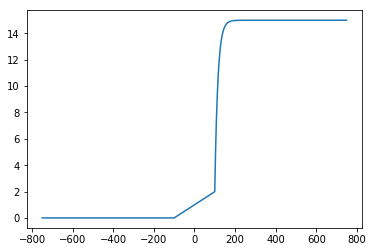

In [6]:
fct = A.Equation.fct_velocity(**param, do_whitening=False)
plt.plot(time, fct);

In [7]:
data = data_false #+ data_true

'''
vis = [False]+[True]+[False]*(len(data_false)-2)
updatemenus = list([
            dict(type='buttons', direction='left', x=-0.5, y=1.1,
                  active=-1, showactive=True, xanchor='left', yanchor='bottom',
                  buttons=list([
                      dict(label='T/F',   method='restyle', args=[{'visible':vis+vis, 'y': [data[i]['y'] for i in range(len(data))]}]),
                      dict(label='False', method='restyle', args=[{'visible':vis,     'y': [data_false[i]['y'] for i in range(len(data_false))]}]),
                      dict(label='True',  method='restyle', args=[{'visible':vis,     'y': [data_true[i]['y'] for i in range(len(data_true))]}])]))
        ])

annotations = list([dict(text='do_whitening:', x=-0.7, y=1.1, yref='paper',xref='paper', align='left', yanchor='bottom', showarrow=False, font={'size':15})])

layout['updatemenus'] = updatemenus
layout['annotations'] = annotations
'''

fig = go.Figure(data=data, layout=layout)
iplot(fig, config=config)
plot(fig, filename='../docs/source/_static/Fct_velocity.html', auto_open=False, config=config)

'file:///home/drone/Bureau/Git/ANEMO/docs/source/_static/Fct_velocity.html'

# fct_velocity_sigmo

In [8]:
liste = ['dir_target', 'latency', 'a_anti',  'steady_state',  'start_anti', 'ramp_pursuit']
dict_list['ramp_pursuit'] = np.linspace(40, 800, 5)
  #  'ramp_pursuit_line': np.linspace(40, 80, 5),
param = dict(x=x,
            start_anti=start_anti,
            latency=latency,
            a_anti=a_anti,
            ramp_pursuit=ramp_pursuit_sigmo,
            steady_state=steady_state,
            dir_target=dir_target)

data_false, layout = generate_data(A.Equation.fct_velocity_sigmo, param, liste, "Fonction Velocity Sigmo", dict_list, do_whitening=False)
#data_true = generat_data(do_whitening=True)

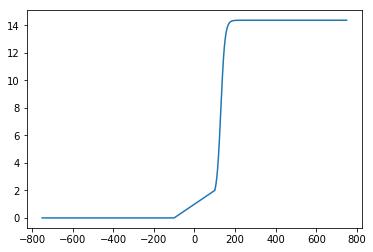

In [9]:
fct = A.Equation.fct_velocity_sigmo(**param, do_whitening=False)

plt.plot(time, fct)

In [10]:
fig = go.Figure(data=data_false, layout=layout)
iplot(fig, config=config)
plot(fig, filename='../docs/source/_static/Fct_velocity_sigmo.html', auto_open=False, config=config)

'file:///home/drone/Bureau/Git/ANEMO/docs/source/_static/Fct_velocity_sigmo.html'

# fct_velocity_line

In [11]:
liste = ['dir_target', 'latency', 'a_anti',  'steady_state',  'start_anti', 'ramp_pursuit']
dict_list['ramp_pursuit'] = np.linspace(40, 80, 5)
param = dict(x=x,
            start_anti=start_anti,
            latency=latency,
            a_anti=a_anti,
            ramp_pursuit=ramp_pursuit_line,
            steady_state=steady_state,
            dir_target=dir_target)

data_false, layout = generate_data(A.Equation.fct_velocity_line, param, liste, "Fonction Velocity Line", dict_list, do_whitening=False)
#data_true = generat_data(do_whitening=True)

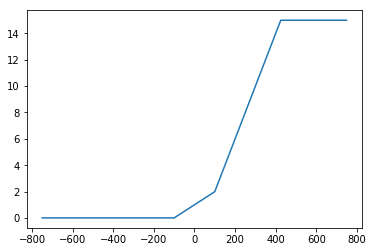

In [12]:
fct = A.Equation.fct_velocity_line(**param, do_whitening=False)

plt.plot(time, fct)

In [13]:
fig = go.Figure(data=data_false, layout=layout)
iplot(fig, config=config)
plot(fig, filename='../docs/source/_static/Fct_velocity_line.html', auto_open=False, config=config)

'file:///home/drone/Bureau/Git/ANEMO/docs/source/_static/Fct_velocity_line.html'